In [1]:
# import depend
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from scipy import stats
from scipy.stats import linregress
from datetime import date
import scipy.stats as st
# output_data = ""
# import 
arrest_by_state = "Resources/Table_22_Arrest_by_State_2016.csv"
income_by_state = "Resources/h08.csv"



In [2]:
# create data frames for each data set. Make sure to use the same data frames throughout 
test_data = pd.read_csv("Resources/Table_22_Arrest_by_State_2016.csv")
test_data.head()

,State,Ages,Total\nall \nclasses1,Violent\ncrime2,Property\ncrime2,Murder and\nnonnegligent\nmanslaughter,Rape3,Robbery,Aggravated\nassault,Burglary,...,Driving\nunder the\ninfluence,Liquor\nlaws,Drunkenness4,Disorderly\nconduct,Vagrancy,All other\noffenses\n(except\ntraffic),Suspicion,Curfew\nand\nloitering\nlaw\nviolations,Number\nof\nagencies,2016\nestimated \npopulation
0,ALABAMA,Under 18,4800,321,1229,15,32,109,165,318,...,28,225,31,378,2,1096,0,0,240.0,3800629.0
1,ALABAMA,Total all ages,154482,6187,18479,312,384,1177,4314,3004,...,8126,2496,7283,2129,67,69052,0,0,NaN,NaN
2,ALASKA,Under 18,1893,216,494,8,21,35,152,104,...,31,121,18,11,0,269,0,12,32.0,738566.0
3,ALASKA,Total all ages,29462,2298,3495,41,130,282,1845,538,...,3063,775,112,738,4,11340,0,12,NaN,NaN
4,ARIZONA,Under 18,22997,1020,5113,15,53,336,616,759,...,211,1668,84,1436,65,2924,0,1061,90.0,6391343.0


In [3]:
test_data2 = pd.read_csv("Resources/h08.csv")
test_data2.head()

,State,2018,Unnamed: 2,2017 (40),Unnamed: 4,2017,Unnamed: 6,2016,Unnamed: 8,2015,...,1988,Unnamed: 66,1987 (21),Unnamed: 68,1986,Unnamed: 70,1985 (20),Unnamed: 72,1984 (19),Unnamed: 74
0,NaN,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,...,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror
1,United States,"63,179",420,"61,136",322,"61,372",335,"59,039",436,"56,516",...,"27,225",139,"26,061",127,"24,897",129,"23,618",128,"22,415",102
2,Alabama,"49,936","2,423","50,865","1,094","51,113",845,"47,221","2,301","44,509",...,"19,948",912,"19,734","1,147","19,132",885,"18,333",760,"17,310",605
3,Alaska,"68,734","3,390","77,987","3,718","72,231","2,719","75,723","4,086","75,112",...,"33,103","1,183","33,233","1,497","31,356","1,017","34,782","1,089","32,356","1,473"
4,Arizona,"62,283","2,291","59,700","2,689","61,125","2,642","57,100","1,971","52,248",...,"26,435",843,"26,749",892,"25,500",718,"23,877",744,"21,425",609


In [4]:
new_df = test_data.loc[:,["State", "Ages", "Total\nall \nclasses1", "Violent\ncrime2", "Property\ncrime2", "Murder and\nnonnegligent\nmanslaughter", "Rape3", "Robbery", "Aggravated\nassault", "Burglary", "Driving\nunder the\ninfluence", "Liquor\nlaws", "Drunkenness4", "Disorderly\nconduct", "Vagrancy", "All other\noffenses\n(except\ntraffic)", "Suspicion", "Curfew\nand\nloitering\nlaw\nviolations", "Number\nof\nagencies", "2016\nestimated \npopulation",]]
new_df.head(15
           )

,State,Ages,Total\nall \nclasses1,Violent\ncrime2,Property\ncrime2,Murder and\nnonnegligent\nmanslaughter,Rape3,Robbery,Aggravated\nassault,Burglary,Driving\nunder the\ninfluence,Liquor\nlaws,Drunkenness4,Disorderly\nconduct,Vagrancy,All other\noffenses\n(except\ntraffic),Suspicion,Curfew\nand\nloitering\nlaw\nviolations,Number\nof\nagencies,2016\nestimated \npopulation
0,ALABAMA,Under 18,4800,321,1229,15,32,109,165,318,28,225,31,378,2,1096,0,0,240.0,3800629.0
1,ALABAMA,Total all ages,154482,6187,18479,312,384,1177,4314,3004,8126,2496,7283,2129,67,69052,0,0,NaN,NaN
2,ALASKA,Under 18,1893,216,494,8,21,35,152,104,31,121,18,11,0,269,0,12,32.0,738566.0
3,ALASKA,Total all ages,29462,2298,3495,41,130,282,1845,538,3063,775,112,738,4,11340,0,12,NaN,NaN
4,ARIZONA,Under 18,22997,1020,5113,15,53,336,616,759,211,1668,84,1436,65,2924,0,1061,90.0,6391343.0
5,ARIZONA,Total all ages,263699,11145,37592,242,344,1849,8710,3957,23498,9745,14100,15874,351,71741,130,1061,NaN,NaN
6,ARKANSAS,Under 18,8045,424,1801,10,44,91,279,414,44,219,87,470,0,1765,0,363,271.0,2786173.0
7,ARKANSAS,Total all ages,132165,4860,13791,143,289,561,3867,2174,6703,1769,6589,2425,890,60504,0,363,NaN,NaN
8,CALIFORNIA,Under 18,58758,7015,12519,92,275,2601,4047,4583,493,1210,880,1264,101,9645,0,1454,613.0,39012007.0
9,CALIFORNIA,Total all ages,1118712,106828,115354,1437,2560,15866,86965,40808,129752,8857,69869,3906,6597,285231,0,1454,NaN,NaN


In [5]:
state_crime_df = new_df.rename(columns={
    "Total\nall \nclasses1": "Total Cases",
    "Violent\ncrime2": "Violent Crime",
    "Property\ncrime2": "Property Crime",
    "Murder and\nnonnegligent\nmanslaughter": "Murder and Non-Negligent Manslaughter",
    "Rape3": "Rape",
    "Aggravated\nassault": "Aggravated Assault",
    "Driving\nunder the\ninfluence": "DUI",
    "Liquor\nlaws": "Liqour Laws",
    "Drunkenness4": "Drunkenness",
    "Disorderly\nconduct": "Disorderly Conduct",
    "All other\noffenses\n(except\ntraffic)": "All Other Offenses, Non Traffic",
    "Curfew\nand\nloitering\nlaw\nviolations": "Curfew and Loitering",
    "Number\nof\nagencies": "Total Number of Police Agencies",
    "2016\nestimated \npopulation": "2016 Estimated Population"
})
state_crime_df.head(20)

,State,Ages,Total Cases,Violent Crime,Property Crime,Murder and Non-Negligent Manslaughter,Rape,Robbery,Aggravated Assault,Burglary,DUI,Liqour Laws,Drunkenness,Disorderly Conduct,Vagrancy,"All Other Offenses, Non Traffic",Suspicion,Curfew and Loitering,Total Number of Police Agencies,2016 Estimated Population
0,ALABAMA,Under 18,4800,321,1229,15,32,109,165,318,28,225,31,378,2,1096,0,0,240.0,3800629.0
1,ALABAMA,Total all ages,154482,6187,18479,312,384,1177,4314,3004,8126,2496,7283,2129,67,69052,0,0,NaN,NaN
2,ALASKA,Under 18,1893,216,494,8,21,35,152,104,31,121,18,11,0,269,0,12,32.0,738566.0
3,ALASKA,Total all ages,29462,2298,3495,41,130,282,1845,538,3063,775,112,738,4,11340,0,12,NaN,NaN
4,ARIZONA,Under 18,22997,1020,5113,15,53,336,616,759,211,1668,84,1436,65,2924,0,1061,90.0,6391343.0
5,ARIZONA,Total all ages,263699,11145,37592,242,344,1849,8710,3957,23498,9745,14100,15874,351,71741,130,1061,NaN,NaN
6,ARKANSAS,Under 18,8045,424,1801,10,44,91,279,414,44,219,87,470,0,1765,0,363,271.0,2786173.0
7,ARKANSAS,Total all ages,132165,4860,13791,143,289,561,3867,2174,6703,1769,6589,2425,890,60504,0,363,NaN,NaN
8,CALIFORNIA,Under 18,58758,7015,12519,92,275,2601,4047,4583,493,1210,880,1264,101,9645,0,1454,613.0,39012007.0
9,CALIFORNIA,Total all ages,1118712,106828,115354,1437,2560,15866,86965,40808,129752,8857,69869,3906,6597,285231,0,1454,NaN,NaN


In [6]:
# grab 2016 column from H08 
income_df = test_data2.loc[:,["State", "2016"]]


In [7]:
#remove NA values
income_df = income_df.dropna()

In [8]:
#Renaming headers
updated_income = income_df.rename(columns={
    "2016": "2016 Median Household Income"
})
#preview of new df
updated_income.head(10)

,State,2016 Median Household Income
1,United States,"59,039"
2,Alabama,"47,221"
3,Alaska,"75,723"
4,Arizona,"57,100"
5,Arkansas,"45,907"
6,California,"66,637"
7,Colorado,"70,566"
8,Connecticut,"75,923"
9,Delaware,"58,046"
10,D.C.,"70,982"


In [9]:
#testing transposing data
age_df = state_crime_df.loc[:,["Ages", "Total Cases"]]
age_df

,Ages,Total Cases
0,Under 18,4800
1,Total all ages,154482
2,Under 18,1893
3,Total all ages,29462
4,Under 18,22997
...,...,...
97,Total all ages,39742
98,Under 18,41813
99,Total all ages,261400
100,Under 18,3332


In [10]:
tr_age = age_df.transpose()
tr_age

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
Ages,Under 18,Total all ages,Under 18,Total all ages,Under 18,Total all ages,Under 18,Total all ages,Under 18,Total all ages,...,Under 18,Total all ages,Under 18,Total all ages,Under 18,Total all ages,Under 18,Total all ages,Under 18,Total all ages
Total Cases,4800,154482,1893,29462,22997,263699,8045,132165,58758,1118712,...,16838,271921,12184,171211,1050,39742,41813,261400,3332,28213


In [11]:
group_state_under_df = state_crime_df.loc[state_crime_df["Ages"] == "Under 18", :]
group_state_under_df.head()

,State,Ages,Total Cases,Violent Crime,Property Crime,Murder and Non-Negligent Manslaughter,Rape,Robbery,Aggravated Assault,Burglary,DUI,Liqour Laws,Drunkenness,Disorderly Conduct,Vagrancy,"All Other Offenses, Non Traffic",Suspicion,Curfew and Loitering,Total Number of Police Agencies,2016 Estimated Population
0,ALABAMA,Under 18,4800,321,1229,15,32,109,165,318,28,225,31,378,2,1096,0,0,240.0,3800629.0
2,ALASKA,Under 18,1893,216,494,8,21,35,152,104,31,121,18,11,0,269,0,12,32.0,738566.0
4,ARIZONA,Under 18,22997,1020,5113,15,53,336,616,759,211,1668,84,1436,65,2924,0,1061,90.0,6391343.0
6,ARKANSAS,Under 18,8045,424,1801,10,44,91,279,414,44,219,87,470,0,1765,0,363,271.0,2786173.0
8,CALIFORNIA,Under 18,58758,7015,12519,92,275,2601,4047,4583,493,1210,880,1264,101,9645,0,1454,613.0,39012007.0


In [12]:
group_state_total_df = state_crime_df.loc[state_crime_df["Ages"] == "Total all ages", :]
group_state_total_df.head()

,State,Ages,Total Cases,Violent Crime,Property Crime,Murder and Non-Negligent Manslaughter,Rape,Robbery,Aggravated Assault,Burglary,DUI,Liqour Laws,Drunkenness,Disorderly Conduct,Vagrancy,"All Other Offenses, Non Traffic",Suspicion,Curfew and Loitering,Total Number of Police Agencies,2016 Estimated Population
1,ALABAMA,Total all ages,154482,6187,18479,312,384,1177,4314,3004,8126,2496,7283,2129,67,69052,0,0,NaN,NaN
3,ALASKA,Total all ages,29462,2298,3495,41,130,282,1845,538,3063,775,112,738,4,11340,0,12,NaN,NaN
5,ARIZONA,Total all ages,263699,11145,37592,242,344,1849,8710,3957,23498,9745,14100,15874,351,71741,130,1061,NaN,NaN
7,ARKANSAS,Total all ages,132165,4860,13791,143,289,561,3867,2174,6703,1769,6589,2425,890,60504,0,363,NaN,NaN
9,CALIFORNIA,Total all ages,1118712,106828,115354,1437,2560,15866,86965,40808,129752,8857,69869,3906,6597,285231,0,1454,NaN,NaN


In [13]:
merged_state_df = pd.merge(group_state_under_df, group_state_total_df, on = "State")
merged_state_df

,State,Ages_x,Total Cases_x,Violent Crime_x,Property Crime_x,Murder and Non-Negligent Manslaughter_x,Rape_x,Robbery_x,Aggravated Assault_x,Burglary_x,...,DUI_y,Liqour Laws_y,Drunkenness_y,Disorderly Conduct_y,Vagrancy_y,"All Other Offenses, Non Traffic_y",Suspicion_y,Curfew and Loitering_y,Total Number of Police Agencies_y,2016 Estimated Population_y
0,ALABAMA,Under 18,4800,321,1229,15,32,109,165,318,...,8126,2496,7283,2129,67,69052,0,0,NaN,NaN
1,ALASKA,Under 18,1893,216,494,8,21,35,152,104,...,3063,775,112,738,4,11340,0,12,NaN,NaN
2,ARIZONA,Under 18,22997,1020,5113,15,53,336,616,759,...,23498,9745,14100,15874,351,71741,130,1061,NaN,NaN
3,ARKANSAS,Under 18,8045,424,1801,10,44,91,279,414,...,6703,1769,6589,2425,890,60504,0,363,NaN,NaN
4,CALIFORNIA,Under 18,58758,7015,12519,92,275,2601,4047,4583,...,129752,8857,69869,3906,6597,285231,0,1454,NaN,NaN
5,COLORADO,Under 18,21548,636,4753,6,52,126,452,432,...,23364,9025,249,7486,453,100277,0,1153,NaN,NaN
6,CONNECTICUT,Under 18,8264,416,1902,5,28,161,222,261,...,8533,225,8,11640,36,26714,0,4,NaN,NaN
7,DELAWARE,Under 18,3704,348,712,5,12,119,212,137,...,355,884,345,1312,332,5558,0,47,NaN,NaN
8,DISTRICT OF COLUMBIA,Under 18,671,83,47,0,0,58,25,0,...,11,1024,89,172,30,7798,0,1,NaN,NaN
9,FLORIDA,Under 18,57843,3861,17688,45,248,1541,2027,4817,...,35042,14280,0,0,0,313994,0,0,NaN,NaN


In [14]:
merged_state_df.columns

Index(['State', 'Ages_x', 'Total Cases_x', 'Violent Crime_x',
       'Property Crime_x', 'Murder and Non-Negligent Manslaughter_x', 'Rape_x',
       'Robbery_x', 'Aggravated Assault_x', 'Burglary_x', 'DUI_x',
       'Liqour Laws_x', 'Drunkenness_x', 'Disorderly Conduct_x', 'Vagrancy_x',
       'All Other Offenses, Non Traffic_x', 'Suspicion_x',
       'Curfew and Loitering_x', 'Total Number of Police Agencies_x',
       '2016 Estimated Population_x', 'Ages_y', 'Total Cases_y',
       'Violent Crime_y', 'Property Crime_y',
       'Murder and Non-Negligent Manslaughter_y', 'Rape_y', 'Robbery_y',
       'Aggravated Assault_y', 'Burglary_y', 'DUI_y', 'Liqour Laws_y',
       'Drunkenness_y', 'Disorderly Conduct_y', 'Vagrancy_y',
       'All Other Offenses, Non Traffic_y', 'Suspicion_y',
       'Curfew and Loitering_y', 'Total Number of Police Agencies_y',
       '2016 Estimated Population_y'],
      dtype='object')

In [15]:
#reamed DF breh
new_state_crime_df = merged_state_df.rename(columns={
    'Ages_x':"Ages_Under",
    'Total Cases_x':"Total Cases_Under",
    'Violent Crime_x':"Violent Crime_Under",
    'Property Crime_x': "Property Crime_Under",
    'Murder and Non-Negligent Manslaughter_x': "Murder and Non-Negligent Manslaughter_Under",
    'Rape_x':"Rape_Under",
    'Robbery_x': "Robbery_Under", 
    'Aggravated Assault_x': "Aggravated Assault_Under", 
    'Burglary_x': "Burglary_Under", 
    'DUI_x': "DUI_Under",
    'Liqour Laws_x': "Liqour Laws_Under", 
    'Drunkenness_x': "Drunkenness_Under", 
    'Disorderly Conduct_x': "Disorderly Conduct_Under", 
    'Vagrancy_x': "Vagrancy_Under",
    'All Other Offenses, Non Traffic_x': "All Other Offenses, Non Traffic_Under", 
    'Suspicion_x': "Suspicion_Under",
    'Curfew and Loitering_x': "Curfew and Loitering_Under", 
    'Total Number of Police Agencies_x': "Total Number of Police Agencies_Under",
    '2016 Estimated Population_x': "2016 Estimated Population_Under", 
    'Ages_y': "Ages_All", 
    'Total Cases_y': "Total Cases_All",
    'Violent Crime_y': "Violent Crime_All", 
    'Property Crime_y': "Property Crime_All",
    'Murder and Non-Negligent Manslaughter_y': "Murder and Non-Negligent Manslaughter_All", 
    'Rape_y': "Rape_All", 
    'Robbery_y': "Robbery_All",
    'Aggravated Assault_y': "Aggravated Assault_All", 
    'Burglary_y': "Burglary_All", 
    'DUI_y': "DUI_All", 
    'Liqour Laws_y': "Liqour Laws_All",
    'Drunkenness_y': "Drunkenness_All", 
    'Disorderly Conduct_y': "Disorderly Conduct_All", 
    'Vagrancy_y': "Vagrancy_All",
    'All Other Offenses, Non Traffic_y': "All Other Offenses, Non Traffic_All", 
    'Suspicion_y': "Suspicion_All",
    'Curfew and Loitering_y': "Curfew and Loitering_All", 
    'Total Number of Police Agencies_y': "Total Number of Police Agencies_All",
    '2016 Estimated Population_y': "2016 Estimated Population_All"   
})
new_state_crime_df

,State,Ages_Under,Total Cases_Under,Violent Crime_Under,Property Crime_Under,Murder and Non-Negligent Manslaughter_Under,Rape_Under,Robbery_Under,Aggravated Assault_Under,Burglary_Under,...,DUI_All,Liqour Laws_All,Drunkenness_All,Disorderly Conduct_All,Vagrancy_All,"All Other Offenses, Non Traffic_All",Suspicion_All,Curfew and Loitering_All,Total Number of Police Agencies_All,2016 Estimated Population_All
0,ALABAMA,Under 18,4800,321,1229,15,32,109,165,318,...,8126,2496,7283,2129,67,69052,0,0,NaN,NaN
1,ALASKA,Under 18,1893,216,494,8,21,35,152,104,...,3063,775,112,738,4,11340,0,12,NaN,NaN
2,ARIZONA,Under 18,22997,1020,5113,15,53,336,616,759,...,23498,9745,14100,15874,351,71741,130,1061,NaN,NaN
3,ARKANSAS,Under 18,8045,424,1801,10,44,91,279,414,...,6703,1769,6589,2425,890,60504,0,363,NaN,NaN
4,CALIFORNIA,Under 18,58758,7015,12519,92,275,2601,4047,4583,...,129752,8857,69869,3906,6597,285231,0,1454,NaN,NaN
5,COLORADO,Under 18,21548,636,4753,6,52,126,452,432,...,23364,9025,249,7486,453,100277,0,1153,NaN,NaN
6,CONNECTICUT,Under 18,8264,416,1902,5,28,161,222,261,...,8533,225,8,11640,36,26714,0,4,NaN,NaN
7,DELAWARE,Under 18,3704,348,712,5,12,119,212,137,...,355,884,345,1312,332,5558,0,47,NaN,NaN
8,DISTRICT OF COLUMBIA,Under 18,671,83,47,0,0,58,25,0,...,11,1024,89,172,30,7798,0,1,NaN,NaN
9,FLORIDA,Under 18,57843,3861,17688,45,248,1541,2027,4817,...,35042,14280,0,0,0,313994,0,0,NaN,NaN


In [16]:
new_state_crime_df.to_csv("Resources/State_Crime.csv", index=False, header=True)

In [17]:
#Total population All Ages
population_df = new_state_crime_df.loc[:,["State", "2016 Estimated Population_Under"]]
population_df

,State,2016 Estimated Population_Under
0,ALABAMA,3800629.0
1,ALASKA,738566.0
2,ARIZONA,6391343.0
3,ARKANSAS,2786173.0
4,CALIFORNIA,39012007.0
5,COLORADO,5008754.0
6,CONNECTICUT,3526707.0
7,DELAWARE,950787.0
8,DISTRICT OF COLUMBIA,0.0
9,FLORIDA,20566240.0


In [18]:
#DROP DC
population_df = population_df.drop([0,8])

In [19]:
#DROP DC
updated_income = updated_income.drop([1,10])

In [20]:
population_df['state_lower'] = population_df['State'].str.lower()
updated_income['state_lower'] = updated_income['State'].str.lower()


In [21]:
merged_pop_df = pd.merge(population_df, updated_income, on = "state_lower")
merged_pop_df

,State_x,2016 Estimated Population_Under,state_lower,State_y,2016 Median Household Income
0,ALASKA,738566.0,alaska,Alaska,"75,723"
1,ARIZONA,6391343.0,arizona,Arizona,"57,100"
2,ARKANSAS,2786173.0,arkansas,Arkansas,"45,907"
3,COLORADO,5008754.0,colorado,Colorado,"70,566"
4,CONNECTICUT,3526707.0,connecticut,Connecticut,"75,923"
5,DELAWARE,950787.0,delaware,Delaware,"58,046"
6,GEORGIA,8150300.0,georgia,Georgia,"53,527"
7,HAWAII,1428557.0,hawaii,Hawaii,"72,133"
8,IDAHO,1324720.0,idaho,Idaho,"56,564"
9,ILLINOIS,2872516.0,illinois,Illinois,"61,386"


In [22]:
clean_pop_df = merged_pop_df.loc[:,["state_lower", "2016 Estimated Population_Under", "2016 Median Household Income"]]
clean_pop_df.head()

,state_lower,2016 Estimated Population_Under,2016 Median Household Income
0,alaska,738566.0,"75,723"
1,arizona,6391343.0,"57,100"
2,arkansas,2786173.0,"45,907"
3,colorado,5008754.0,"70,566"
4,connecticut,3526707.0,"75,923"


In [23]:
clean_slimpop_df = clean_pop_df.rename(columns={
    "state_lower": "State",
    "2016 Estimated Population_Under": "2016 Estimated Population"
})
clean_slimpop_df


,State,2016 Estimated Population,2016 Median Household Income
0,alaska,738566.0,"75,723"
1,arizona,6391343.0,"57,100"
2,arkansas,2786173.0,"45,907"
3,colorado,5008754.0,"70,566"
4,connecticut,3526707.0,"75,923"
5,delaware,950787.0,"58,046"
6,georgia,8150300.0,"53,527"
7,hawaii,1428557.0,"72,133"
8,idaho,1324720.0,"56,564"
9,illinois,2872516.0,"61,386"


In [24]:
clean_slimpop_df["2016 Median Household Income"] = clean_slimpop_df["2016 Median Household Income"].str.replace(",","").astype(float)

In [25]:
clean_slimpop_df.head()

,State,2016 Estimated Population,2016 Median Household Income
0,alaska,738566.0,75723.0
1,arizona,6391343.0,57100.0
2,arkansas,2786173.0,45907.0
3,colorado,5008754.0,70566.0
4,connecticut,3526707.0,75923.0


In [26]:
clean_slimpop_df.dtypes

State                            object
2016 Estimated Population       float64
2016 Median Household Income    float64
dtype: object

In [27]:
# Set x axis and tick locations
x_axis = np.arange(len(clean_slimpop_df))
tick_locations = [value for value in x_axis]

Text(0, 0.5, 'Estimated Population (Millions)')

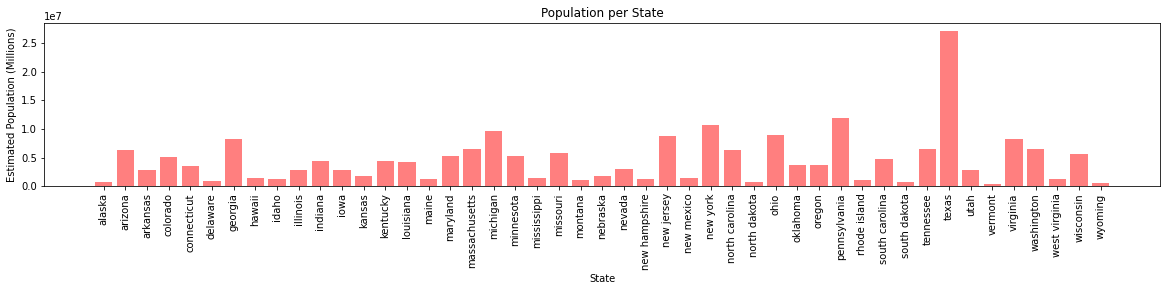

In [28]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, clean_slimpop_df["2016 Estimated Population"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, clean_slimpop_df["State"], rotation="vertical")
plt.title("Population per State")
plt.xlabel("State")
plt.ylabel("Estimated Population (Millions)")


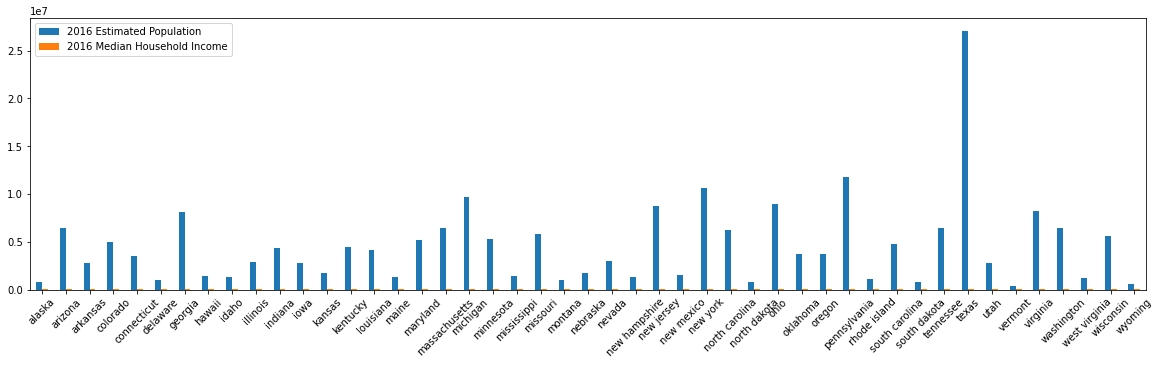

In [29]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = clean_slimpop_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(clean_slimpop_df["State"], rotation=45)

plt.show()

# Under 18 vs Household Median Income

In [46]:
new_state_crime_df['state_lower'] = new_state_crime_df['State'].str.lower()
updated_income['state_lower'] = updated_income['State'].str.lower()

In [48]:
age_by_income.columns

Index(['State_x', 'Ages_Under', 'Total Cases_Under', 'Violent Crime_Under',
       'Property Crime_Under', 'Murder and Non-Negligent Manslaughter_Under',
       'Rape_Under', 'Robbery_Under', 'Aggravated Assault_Under',
       'Burglary_Under', 'DUI_Under', 'Liqour Laws_Under', 'Drunkenness_Under',
       'Disorderly Conduct_Under', 'Vagrancy_Under',
       'All Other Offenses, Non Traffic_Under', 'Suspicion_Under',
       'Curfew and Loitering_Under', 'Total Number of Police Agencies_Under',
       '2016 Estimated Population_Under', 'Ages_All', 'Total Cases_All',
       'Violent Crime_All', 'Property Crime_All',
       'Murder and Non-Negligent Manslaughter_All', 'Rape_All', 'Robbery_All',
       'Aggravated Assault_All', 'Burglary_All', 'DUI_All', 'Liqour Laws_All',
       'Drunkenness_All', 'Disorderly Conduct_All', 'Vagrancy_All',
       'All Other Offenses, Non Traffic_All', 'Suspicion_All',
       'Curfew and Loitering_All', 'Total Number of Police Agencies_All',
       '2016 Est

In [49]:
# Create DF for Under 18 vs Household Median Income
age_by_income = pd.merge(new_state_crime_df, updated_income, on ='state_lower')
age_by_income.head()

,State_x,Ages_Under,Total Cases_Under,Violent Crime_Under,Property Crime_Under,Murder and Non-Negligent Manslaughter_Under,Rape_Under,Robbery_Under,Aggravated Assault_Under,Burglary_Under,...,Vagrancy_All,"All Other Offenses, Non Traffic_All",Suspicion_All,Curfew and Loitering_All,Total Number of Police Agencies_All,2016 Estimated Population_All,state_lower,Total Cases over 18,State_y,2016 Median Household Income
0,ALASKA,Under 18,1893,216,494,8,21,35,152,104,...,4,11340,0,12,NaN,NaN,alaska,27569,Alaska,"75,723"
1,ARIZONA,Under 18,22997,1020,5113,15,53,336,616,759,...,351,71741,130,1061,NaN,NaN,arizona,240702,Arizona,"57,100"
2,ARKANSAS,Under 18,8045,424,1801,10,44,91,279,414,...,890,60504,0,363,NaN,NaN,arkansas,124120,Arkansas,"45,907"
3,COLORADO,Under 18,21548,636,4753,6,52,126,452,432,...,453,100277,0,1153,NaN,NaN,colorado,204162,Colorado,"70,566"
4,CONNECTICUT,Under 18,8264,416,1902,5,28,161,222,261,...,36,26714,0,4,NaN,NaN,connecticut,92016,Connecticut,"75,923"


In [61]:
# TOTAL CASES OVER 18
age_by_income["Total Cases Over 18"] = (age_by_income["Total Cases_All"] - age_by_income["Total Cases_Under"])
age_by_income.columns

Index(['State_x', 'Ages_Under', 'Total Cases_Under', 'Violent Crime_Under',
       'Property Crime_Under', 'Murder and Non-Negligent Manslaughter_Under',
       'Rape_Under', 'Robbery_Under', 'Aggravated Assault_Under',
       'Burglary_Under', 'DUI_Under', 'Liqour Laws_Under', 'Drunkenness_Under',
       'Disorderly Conduct_Under', 'Vagrancy_Under',
       'All Other Offenses, Non Traffic_Under', 'Suspicion_Under',
       'Curfew and Loitering_Under', 'Total Number of Police Agencies_Under',
       '2016 Estimated Population_Under', 'Ages_All', 'Total Cases_All',
       'Violent Crime_All', 'Property Crime_All',
       'Murder and Non-Negligent Manslaughter_All', 'Rape_All', 'Robbery_All',
       'Aggravated Assault_All', 'Burglary_All', 'DUI_All', 'Liqour Laws_All',
       'Drunkenness_All', 'Disorderly Conduct_All', 'Vagrancy_All',
       'All Other Offenses, Non Traffic_All', 'Suspicion_All',
       'Curfew and Loitering_All', 'Total Number of Police Agencies_All',
       '2016 Est

In [67]:
# DATAFRAME WITH TOTAL CASES UNDER 18 AND OVER 18
age_under_over18 = age_by_income.loc[:, ["state_lower","Total Cases_Under","Total Cases Over 18","2016 Median Household Income"]]
age_under_over18["2016 Median Household Income"] = age_under_over18["2016 Median Household Income"].str.replace(",","").astype(float)
age_under_over18 = age_under_over18.rename(columns={"state_lower": "States", "Total Cases_Under": "Total Cases Under 18"})
age_under_over18.head()

,States,Total Cases Under 18,Total Cases Over 18,2016 Median Household Income
0,alaska,1893,27569,75723.0
1,arizona,22997,240702,57100.0
2,arkansas,8045,124120,45907.0
3,colorado,21548,204162,70566.0
4,connecticut,8264,92016,75923.0


In [50]:
new_age_income = age_by_income.loc[:, ['state_lower', 'Total Cases_Under', '2016 Median Household Income', '2016 Estimated Population_Under']]
new_age_income = new_age_income.rename(columns={
    "state_lower": "State",
    "Total Cases_Under": "Total Cases Under 18"
})

new_age_income["2016 Median Household Income"] = new_age_income["2016 Median Household Income"].str.replace(",","").astype(float)
new_age_income.head()

,State,Total Cases Under 18,2016 Median Household Income,2016 Estimated Population_Under
0,alaska,1893,75723.0,738566.0
1,arizona,22997,57100.0,6391343.0
2,arkansas,8045,45907.0,2786173.0
3,colorado,21548,70566.0,5008754.0
4,connecticut,8264,75923.0,3526707.0


In [51]:
new_age_income.sort_values(by='Total Cases Under 18', ascending=False).head()

,State,Total Cases Under 18,2016 Median Household Income,2016 Estimated Population_Under
39,texas,65539,58146.0,27089093.0
45,wisconsin,41813,59817.0,5643675.0
34,pennsylvania,40826,60979.0,11822238.0
1,arizona,22997,57100.0,6391343.0
6,georgia,22646,53527.0,8150300.0


In [52]:
new_age_income.dtypes

State                               object
Total Cases Under 18                 int64
2016 Median Household Income       float64
2016 Estimated Population_Under    float64
dtype: object

In [53]:
# PERCENT OF UNDER 18 CASES BY TOTAL POPULATION
new_age_income["Percentage"] = (new_age_income['Total Cases Under 18'] / new_age_income['2016 Estimated Population_Under'])

new_age_income["Percentage"] = new_age_income["Percentage"].map("{:,.2%}".format)
new_age_income

,State,Total Cases Under 18,2016 Median Household Income,2016 Estimated Population_Under,Percentage
0,alaska,1893,75723.0,738566.0,0.26%
1,arizona,22997,57100.0,6391343.0,0.36%
2,arkansas,8045,45907.0,2786173.0,0.29%
3,colorado,21548,70566.0,5008754.0,0.43%
4,connecticut,8264,75923.0,3526707.0,0.23%
5,delaware,3704,58046.0,950787.0,0.39%
6,georgia,22646,53527.0,8150300.0,0.28%
7,hawaii,3597,72133.0,1428557.0,0.25%
8,idaho,5298,56564.0,1324720.0,0.40%
9,illinois,10186,61386.0,2872516.0,0.35%


In [ ]:
age_by_income["Total Violent Crime Over 18"] = (age_by_income["Violent Crime_All"] - age_by_income["Violent Crime_Under"])
age_by_income["Total Property Crime Over 18"] = (age_by_income["Property Crime_All"] - age_by_income["Property Crime_Under"])
age_by_income.columns

NameError: name 'age_by_income' is not defined

In [ ]:
#Creating DataFrame for Household Income vs Crime
# DATAFRAME WITH TOTAL CASES UNDER 18 AND OVER 18
household_crime = age_by_income.loc[:, ["state_lower","Total Cases_Under","Violent Crime_Under", "Property Crime_Under","Total Cases Over 18","2016 Median Household Income"]]
household_crime["2016 Median Household Income"] = age_under_over18["2016 Median Household Income"].str.replace(",","").astype(float)
household_crime = age_under_over18.rename(columns={"state_lower": "States", "Total Cases_Under": "Total Cases Under 18"})
household_crime.head()




Total Cases_Under	Violent Crime_Under	Property Crime_Under